In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

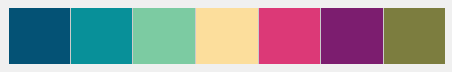

In [67]:
palette = [
    '#045275', '#089099', '#7CCBA2', '#FCDE9C', '#DC3977', '#7C1D6F', '#7C7D3F'
]
countries = [
    'Italy', 'Germany', 'United Kingdom', 'United States', 'Spain', 'France', 'Switzerland'   
]
colors = dict(zip(countries, palette))
sns.palplot(palette)

In [68]:
fold = '/Users/milko/Local/Data/Disease/datahub.io-covid-19/data/'
host = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/'
population = pd.read_csv(
    '/Users/milko/Local/Data/Disease/Kaggle-COVID-19/world_bank/global-population.csv',
    usecols=['country', 'year_2018']
)
population = population[population['country'].isin(countries)]\
    .set_index('country').T.to_dict(orient='records')[0]

In [69]:
dset = pd.read_csv(
    fold + 'countries-aggregated.csv',
    parse_dates=['Date']
)
dset['Country'] = dset['Country'].apply(lambda x: 'United States' if x == 'US' else x)
dset.info()
print("From: {} To: {}".format(dset['Date'].min(), dset['Date'].max()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14800 non-null  datetime64[ns]
 1   Country    14800 non-null  object        
 2   Confirmed  14800 non-null  int64         
 3   Recovered  14800 non-null  int64         
 4   Deaths     14800 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 578.2+ KB
From: 2020-01-22 00:00:00 To: 2020-04-10 00:00:00


In [70]:
# Select target countries
dset = dset[dset['Country'].isin(countries)]
dset['Country'].unique()

array(['France', 'Germany', 'Italy', 'Spain', 'Switzerland',
       'United States', 'United Kingdom'], dtype=object)

In [72]:
# Add Other counts
dset['Active'] = dset['Confirmed'] - (dset['Recovered'] + dset['Deaths'])
dset['Cases'] = dset['Confirmed'] + dset['Recovered'] + dset['Deaths']
dset.head()

,Date,Country,Confirmed,Recovered,Deaths,Active,Cases
61,2020-01-22,France,0,0,0,0,0
65,2020-01-22,Germany,0,0,0,0,0
84,2020-01-22,Italy,0,0,0,0,0
156,2020-01-22,Spain,0,0,0,0,0
161,2020-01-22,Switzerland,0,0,0,0,0


In [73]:
df = dset.pivot(index='Date', columns='Country', values='Cases')
# countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.head()

Country,France,Germany,Italy,Spain,Switzerland,United Kingdom,United States
Date,,,,,,,
2020-01-22,0,0,0,0,0,0,1
2020-01-23,0,0,0,0,0,0,1
2020-01-24,2,0,0,0,0,0,2
2020-01-25,3,0,0,0,0,0,2
2020-01-26,3,0,0,0,0,0,5


In [74]:
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/population[country]*100000
percapita.head()

Country,France,Germany,Italy,Spain,Switzerland,United Kingdom,United States
Date,,,,,,,
2020-01-22,0.000000,0.0,0.0,0.0,0.0,0.0,0.000306
2020-01-23,0.000000,0.0,0.0,0.0,0.0,0.0,0.000306
2020-01-24,0.002986,0.0,0.0,0.0,0.0,0.0,0.000611
2020-01-25,0.004478,0.0,0.0,0.0,0.0,0.0,0.000611
2020-01-26,0.004478,0.0,0.0,0.0,0.0,0.0,0.001528


Text(2020-01-23 00:00:00, 588911, 'COVID-19 Cases by Country')

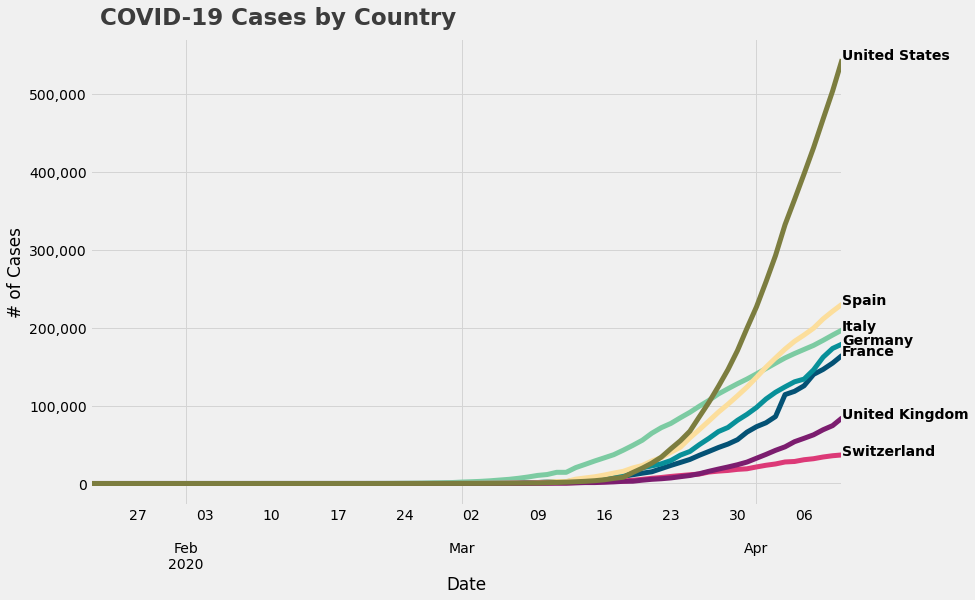

In [75]:
# Set style
plt.style.use('fivethirtyeight')

# Generate plot
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Assign colors
for country in list(colors.keys()):
    plot.text(
        x = covid.index[-1], y = covid[country].max(),
        # color = colors[country],
        s = country, weight = 'bold'
    )

# Add labels
plot.text(
    x = covid.index[1], y = int(covid.max().max())+45000,
    s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = 0.75
)

Text(2020-01-23 00:00:00, 532.3021052955319, 'Per Capita COVID-19 Cases by Country')

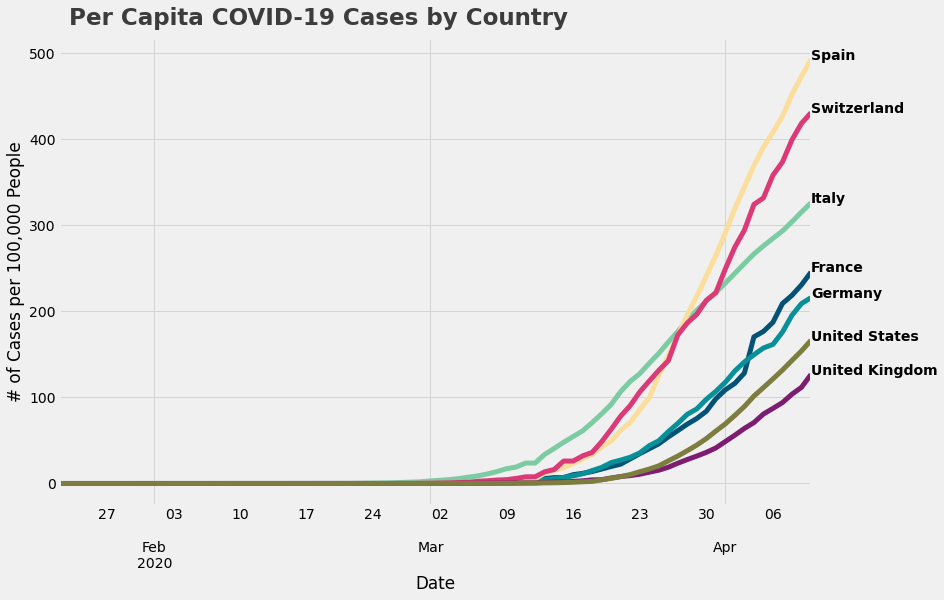

In [76]:
percapitaplot = percapita.plot(
    figsize=(12,8),
    color=list(colors.values()), linewidth=5,
    legend=False
)

percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')

for country in list(colors.keys()):
    percapitaplot.text(
        x = percapita.index[-1], y = percapita[country].max(),
        # color = colors[country],
        s = country,
        weight = 'bold')

percapitaplot.text(
    x = percapita.index[1], y = percapita.max().max()+40,
    s = "Per Capita COVID-19 Cases by Country",
    fontsize = 23, weight = 'bold', alpha = .75
)

In [55]:
country = 'Italy'

Text(2020-01-23 00:00:00, 147577, 'Italy')

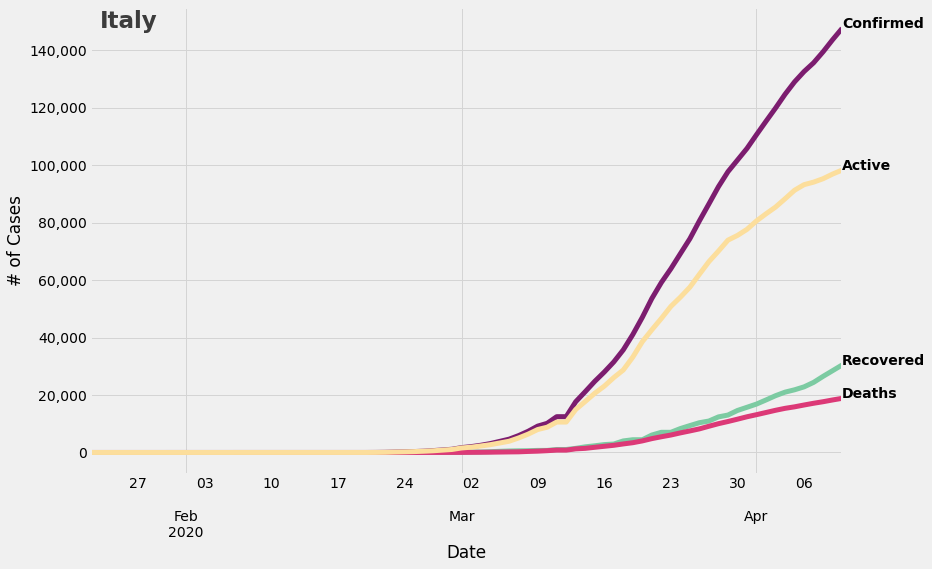

In [56]:
# Make Italy plot data
df = dset[dset['Country'] == country].drop(columns=['Country', 'Cases']).copy()
df.set_index('Date', inplace=True)

# Set columns
columns = dict(
    Confirmed='#7C1D6F', Recovered='#7CCBA2',
    Deaths='#DC3977', Active='#FCDE9C'
)

# Set style
plt.style.use('fivethirtyeight')

# Generate plot
plot = df.plot(figsize=(12,8), color=list(columns.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Assign colors
for column in list(columns.keys()):
    plot.text(
        x = df.index[-1], y = df[column].max(),
        # color = columns[column],
        s = column, weight = 'bold'
    )

# Add labels
plot.text(
    x = df.index[1], y = int(df.max().max()),
    s = "Italy", fontsize = 23, weight = 'bold', alpha = 0.75
)

In [116]:
population.to_dict(orient='dict')

{'year_2018': {'United States': 327167434.0,
  'Germany': 82927922.0,
  'United Kingdom': 66488991.0,
  'Italy': 60431283.0,
  'Spain': 46723749.0,
  'Sweden': 10183175.0}}

In [80]:
dset[dset['Country'].isin(countries)]

,Date,Country,Confirmed,Recovered,Deaths
65,2020-01-22,Germany,0,0,0
84,2020-01-22,Italy,0,0,0
156,2020-01-22,Spain,0,0,0
160,2020-01-22,Sweden,0,0,0
171,2020-01-22,United States,1,0,0
...,...,...,...,...,...
14699,2020-04-10,Italy,147577,30455,18849
14771,2020-04-10,Spain,158273,55668,16081
14775,2020-04-10,Sweden,9685,381,870
14786,2020-04-10,United States,496535,28790,18586
